# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

* Problem definition
* Data
* Evaluation
* Features
* Modelling
* Experimentation

## Problem Definition
In a statement,

>Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
* Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
* thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## preparing the tools

use pandas, numpy and matplotlib


In [2]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn


EnvironmentLocationNotFound: Not a conda environment: C:\Users\Kapil



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score


In [2]:
from sklearn.metrics import RocCurveDisplay

## Load data


In [3]:
df = pd.read_csv("11.2 heart-disease.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

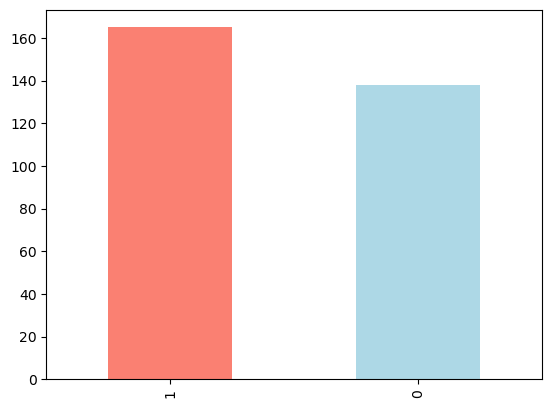

In [10]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [15]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


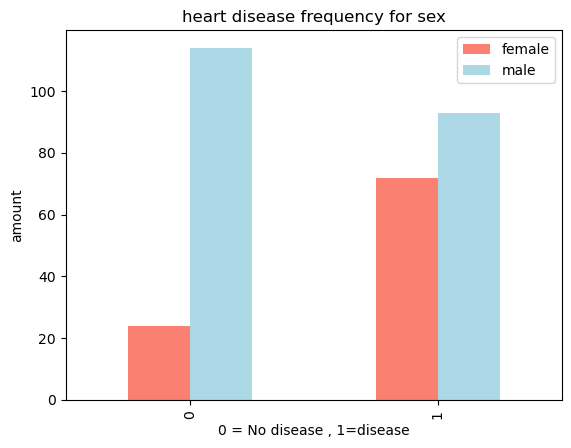

In [6]:
pd.crosstab(df.target,df.sex).plot(kind="bar",color={"salmon","lightblue"});
plt.title("heart disease frequency for sex")
plt.xlabel("0 = No disease , 1=disease")
plt.ylabel("amount")
plt.legend(["female","male"])

# age vs max heart rate for heart diseasem

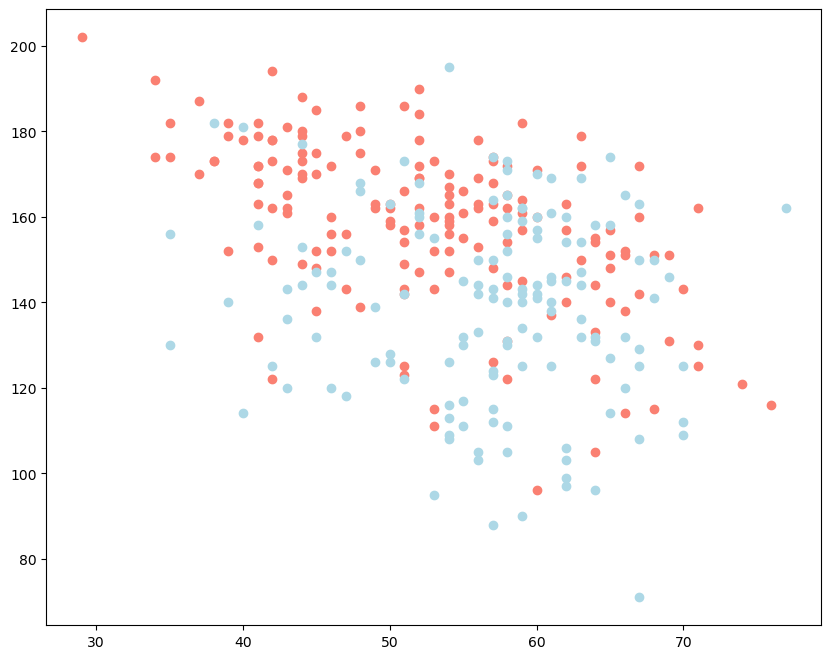

In [23]:
plt.figure(figsize=(10,8))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")


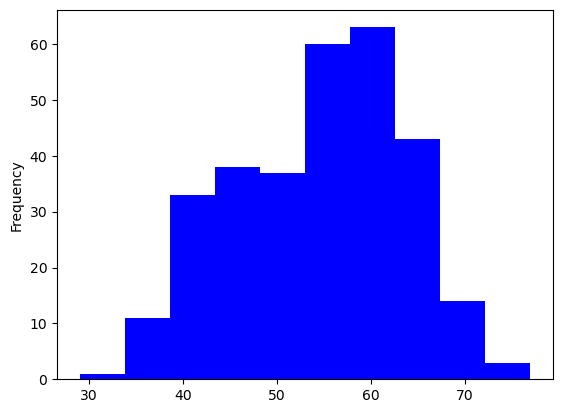

In [27]:
 df.age.plot(kind="hist",
            color="blue");

In [28]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [7]:
#make correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

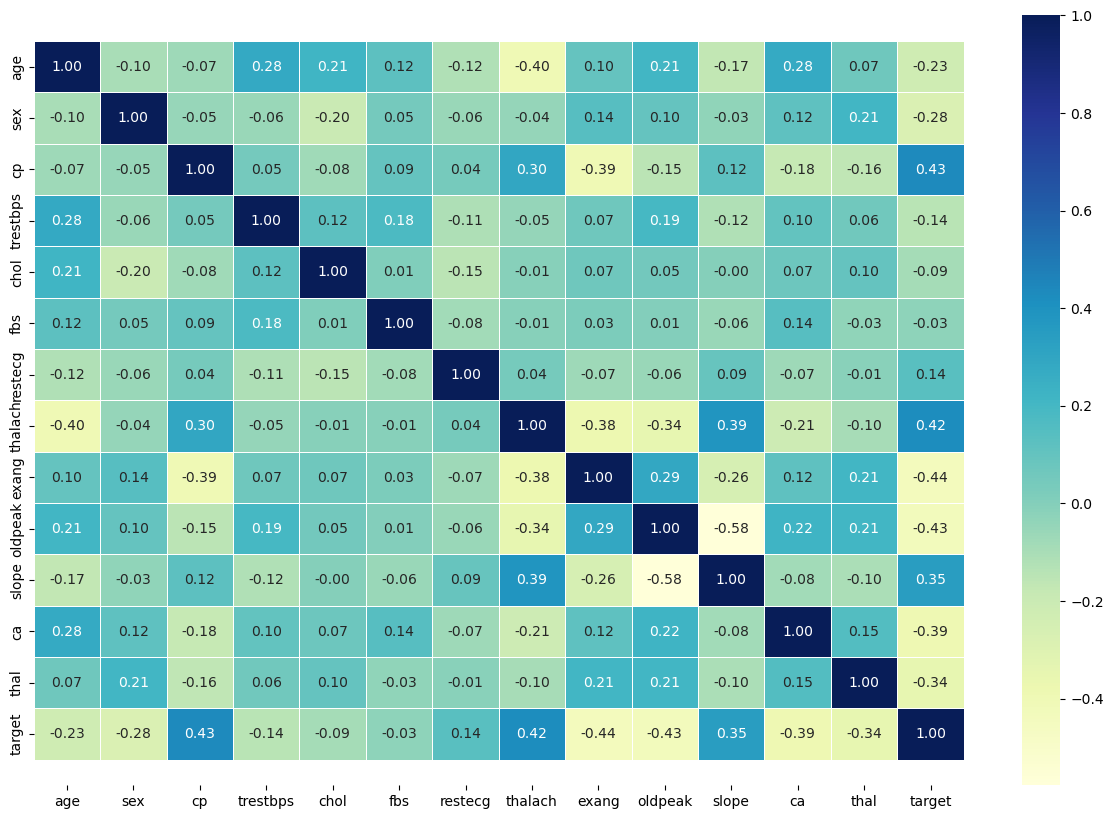

In [8]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,
                linewidth=0.5,
                fmt=".2f",
                 cmap="YlGnBu");
bottom,top=ax.get_ylim();
ax.set_ylim(bottom+0.5,top-0.5)

# 5.Modeling

In [9]:
#split data into x and y 
X=df.drop("target",axis=1)
y=df["target"]

In [10]:
X


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [12]:
len(y)

303

In [14]:
#split data into train and test set
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


### try some models 

In [15]:
 models = { "Logistic Regression": LogisticRegression(),
            "KNN": KNeighborsClassifier(),
            "Random Forest": RandomForestClassifier()
             }
    
 def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    
    model_scores={}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        
        model_scores[name]=model.score(X_test,y_test)
        
    return  model_scores

In [16]:
model_scores=fit_and_score(models=models,X_train=X_train,
                           X_test=X_test,y_train=y_train,
                           y_test=y_test)

model_scores

C:\Users\Kapil Pratihar\OneDrive\Desktop\ML-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### model comparision

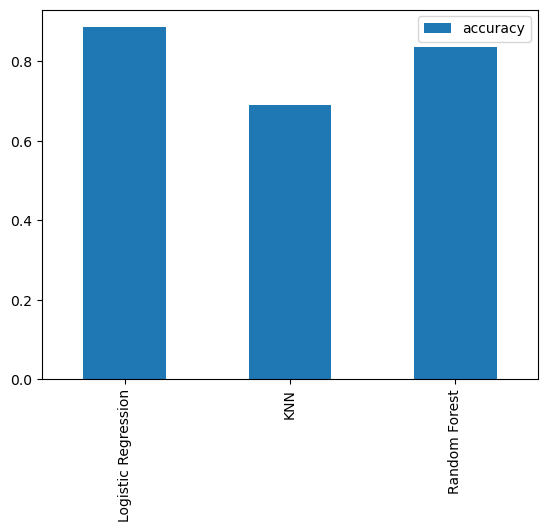

In [17]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

 ### lets look at the following
    * hyperparameter 
    * feature importance 
    * cinfusion matrix
    * cross validation
    * precision
    * Recall
    * F1 score
    * Classification report
    * ROC curve
    * area under the curve
    

In [18]:
train_scores=[]
test_scores=[]

neighbors=range(1,21)

knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    
    test_scores.append(knn.score(X_test,y_test))

In [19]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [20]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

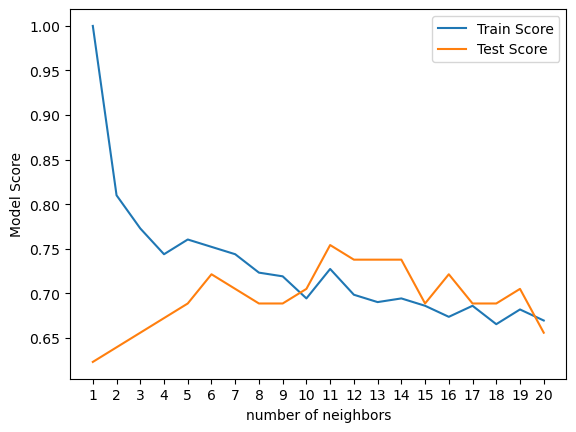

In [24]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of neighbors")
plt.ylabel("Model Score")
plt.legend()

#max(test_scores)*100:.2f

## Hyperparameter tuning with RandomizedSearchCV

we are going to tune:
* Logistic Regression
* randomforestclassifier

...using randomizedsearchcv

In [34]:
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}

rf_grid = { "n_estimators": np.arange(10,1000,50),
            "max_depth": [None,3,5,10],
            "min_samples_split": np.arange(2,20,2),
            "min_samples_leaf": np.arange(1,20,2)
            }

In [27]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [31]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

now for randomforestclassifier

In [35]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [37]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## hyperparameter tuning with GridseaarchCV

In [38]:
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

## evaluating our tuned ml classifier,beyond classifier

Roc,confusion matrix,classification report,precision,recall,f1-score

In [43]:
y_preds=gs_log_reg.predict(X_test)

In [44]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [45]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

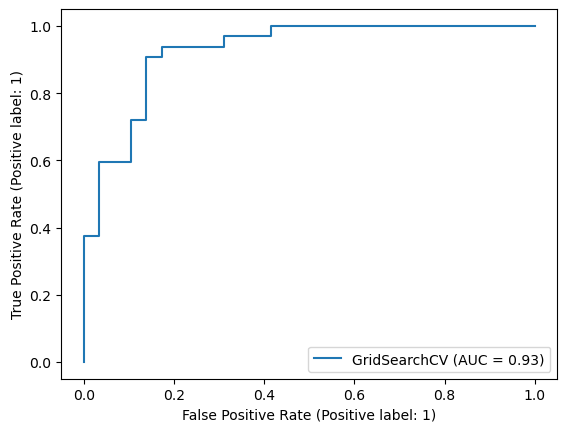

In [48]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [49]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


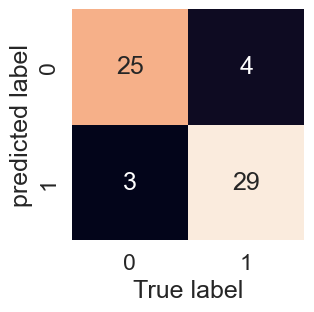

In [52]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig, ax = plt.subplots(figsize=(3,3,))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_preds)

In [53]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [54]:
#accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

cv_acc


array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [55]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [56]:
#precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")

cv_precision
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [57]:
#recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")

cv_recall
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [58]:
#f1 score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")

cv_f1
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

### Feature importance

feature contributed the most to outcome

In [59]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [60]:
clf.fit(X_train,y_train);

In [61]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [62]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

<AxesSubplot: title={'center': 'Feature Importance'}>

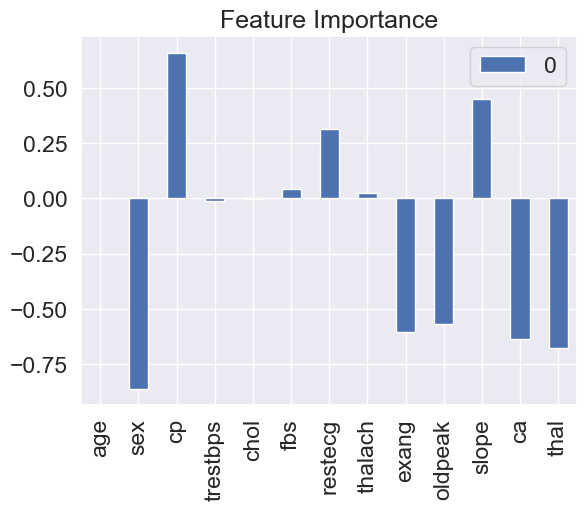

In [63]:
feature_df= pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=True)

# Experimentation

In [64]:
import pickle
pickle.dump(clf,open("heart_disease_model_1.pkl","wb"))

In [65]:
loaded = pickle.load(open("heart_disease_model_1.pkl","rb"))


In [66]:
pickle_pred = loaded.predict(X_test)
evaluate_preds(y_test,pickle_pred)

NameError: name 'evaluate_preds' is not defined